前言

       在上一期的Python绘图系列中，我们仔细的讲解了如何绘制数值型变量的箱线图，展现数据的分布，我们还可以使用直方图来说明，同过图形的长相，就可以快速的判断数据是否近似服从正态分布。之所以我们很关心数据的分布，是因为在统计学中，很多假设条件都会包括正态分布，故使用直方图来定性的判定数据的分布情况，尤其显得重要。这期我们就来介绍Python中如何绘制一个直方图。

hist函数的参数解读

       绘图之前，我们先来讲解一下matplotlib包中hist函数的参数含义及使用方法：

In [ ]:
plt.hist(x, bins=10, range=None, normed=False, 
        weights=None, cumulative=False, bottom=None, 
        histtype='bar', align='mid', orientation='vertical', 
        rwidth=None, log=False, color=None, 
        label=None, stacked=False)

In [ ]:
x：指定要绘制直方图的数据；
bins：指定直方图条形的个数；
range：指定直方图数据的上下界，默认包含绘图数据的最大值和最小值；
normed：是否将直方图的频数转换成频率；
weights：该参数可为每一个数据点设置权重；
cumulative：是否需要计算累计频数或频率；
bottom：可以为直方图的每个条形添加基准线，默认为0；
histtype：指定直方图的类型，默认为bar，除此还有’barstacked’, ‘step’,  ‘stepfilled’；
align：设置条形边界值的对其方式，默认为mid，除此还有’left’和’right’；
orientation：设置直方图的摆放方向，默认为垂直方向；
rwidth：设置直方图条形宽度的百分比；
log：是否需要对绘图数据进行log变换；
color：设置直方图的填充色；
label：设置直方图的标签，可通过legend展示其图例；
stacked：当有多个数据时，是否需要将直方图呈堆叠摆放，默认水平摆放；

一元直方图的绘制

案例：titanic数据集

整体乘客的年龄直方图

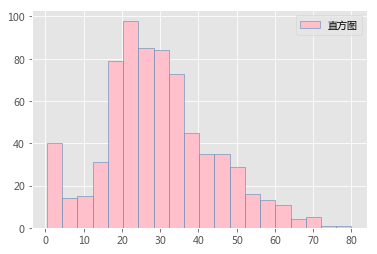

In [5]:
# 导入第三方包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取Titanic数据集
titanic = pd.read_csv('titanic_train.csv')
# 检查年龄是否有缺失any(titanic.Age.isnull())
# 不妨删除含有缺失年龄的观察
titanic.dropna(subset=['Age'], inplace=True)

# 设置图形的显示风格
plt.style.use('ggplot')
# 绘图：乘客年龄的频数直方图
plt.hist(titanic.Age, # 绘图数据
        bins = 20, # 指定直方图的条形数为20个
        color = 'pink', # 指定填充色
        edgecolor = 'steelblue', # 指定直方图的边界色
        label = '直方图' )# 为直方图呈现标签

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')
# 显示图例
plt.legend()
# 显示图形
plt.show()

上图绘制的是年龄的频数直方图，从整体的分布来看，有点像正态分布，两边低中间高的倒钟形状。除此，我们还可以绘制累计频率直方图，并且设置5岁为组距，如下代码可以表示成：

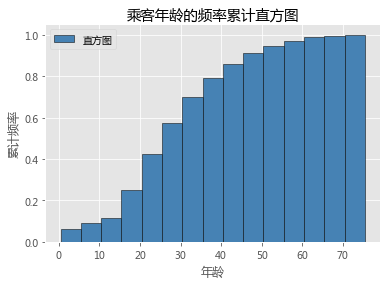

In [2]:
# 绘图：乘客年龄的累计频率直方图
plt.hist(titanic.Age, # 绘图数据
        bins = np.arange(titanic.Age.min(),titanic.Age.max(),5), # 指定直方图的组距
        normed = True, # 设置为频率直方图
        cumulative = True, # 积累直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k', # 指定直方图的边界色
        label = '直方图' )# 为直方图呈现标签

# 设置坐标轴标签和标题
plt.title('乘客年龄的频率累计直方图')
plt.xlabel('年龄')
plt.ylabel('累计频率')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend(loc = 'best')
# 显示图形
plt.show()

通过累计频率直方图就可以快速的发现什么年龄段的人数占了多少比重，例如35岁以下的乘客占了7成，这种图的解读有点像帕累托图。为了测试数据集是否近似服从正态分布，需要在直方图的基础上再绘制两条线，一条表示理论的正态分布曲线，另一条为核密度曲线，目的就是比较两条曲线的吻合度，越吻合就说明数据越近似于正态分布。接下来我们就在直方图的基础上再添加两条曲线：

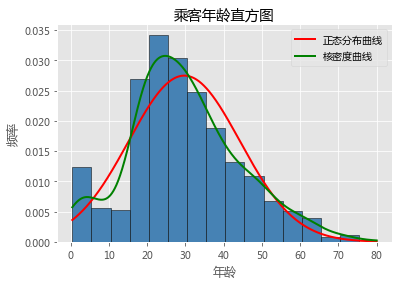

In [6]:
# 正太分布图
plt.hist(titanic.Age, # 绘图数据
        bins = np.arange(titanic.Age.min(),titanic.Age.max(),5), # 指定直方图的组距
        normed = True, # 设置为频率直方图
        color = 'steelblue', # 指定填充色
        edgecolor = 'k') # 指定直方图的边界色

# 设置坐标轴标签和标题
plt.title('乘客年龄直方图')
plt.xlabel('年龄')
plt.ylabel('频率')

# 生成正态曲线的数据
x1 = np.linspace(titanic.Age.min(), titanic.Age.max(), 1000)
normal = mlab.normpdf(x1, titanic.Age.mean(), titanic.Age.std())
# 绘制正态分布曲线
line1, = plt.plot(x1,normal,'r-', linewidth = 2) 

# 生成核密度曲线的数据
kde = mlab.GaussianKDE(titanic.Age)
x2 = np.linspace(titanic.Age.min(), titanic.Age.max(), 1000)
# 绘制
line2, = plt.plot(x2,kde(x2),'g-', linewidth = 2)

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend([line1, line2],['正态分布曲线','核密度曲线'],loc='best')
# 显示图形
plt.show()

从直方图的展现来看，乘客的年龄分布与理论正态分布曲线存在一些差异，说明不服从正态分布，而且从图中也能看见，年龄呈现右偏的特征。

二元直方图的绘制

       上面绘制的直方图都是基于所有乘客的年龄，如果想对比男女乘客的年龄直方图的话，我们可以通过两个hist将不同性别的直方图绘制到一张图内，具体代码如下：

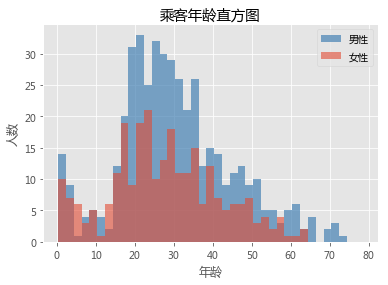

In [8]:
# 提取不同性别的年龄数据
age_female = titanic.Age[titanic.Sex == 'female']
age_male = titanic.Age[titanic.Sex == 'male']

# 设置直方图的组距
bins = np.arange(titanic.Age.min(), titanic.Age.max(), 2)
# 男性乘客年龄直方图
plt.hist(age_male, bins = bins, label = '男性', color = 'steelblue', alpha = 0.7)
# 女性乘客年龄直方图
plt.hist(age_female, bins = bins, label = '女性', alpha = 0.6)

# 设置坐标轴标签和标题
plt.title('乘客年龄直方图')
plt.xlabel('年龄')
plt.ylabel('人数')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 显示图例
plt.legend()
# 显示图形
plt.show()

图中结果反映了，不同年龄组内几乎都是男性乘客比女性乘客要多；同时，也说明男女性别的年龄组分布几乎一致。